In [1]:
import pandas as pd #for csv file handling
import numpy as np #for scientific calculation
import random as rnd #for random number generation between 0 to 1


In [2]:
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# for machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df=pd.read_csv("train.csv")
train_df
# this is testing data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df=pd.read_csv("test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
combine=[train_df,test_df]
type(combine) #combine is list type contain both dataframe

list

In [7]:
print(train_df.columns.values) #print all columns for data

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# categorial value= Survied, Pclass, Sex, Sibsp, Parch , Cabin, Embarked 

In [10]:
# check for Null value in training data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# key points
#mean age of people is 29.69 while median is 28
# more than 25 % people survied and less than 50% say around(30%)


In [13]:
train_df.describe(include=['O'])# to get behaviour of string data

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Crosby, Miss. Harriet R",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [14]:
# Cabin can be drop because it contain mostly NULL
# PassengerId can be droped because it is mostly NULL
# Ticket can be droped becouse it is mostly AlhpaNumeric
# Name can be drop because it has no relation with Survival


In [15]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Pclass')
# show survival vs PassengerClass 
#its shows passenger having first class having more chance of survival than others


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[['Embarked','Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [17]:
# C Embarked have high chance to survived

In [18]:
train_df[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
# female have very high chance of survival

In [20]:
train_df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
train_df[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [22]:
train_df[['Age','Survived']].groupby('Age',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [23]:
# child and old people have high rate of survival then others

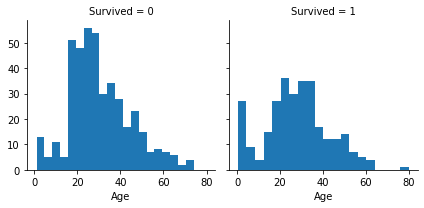

In [24]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

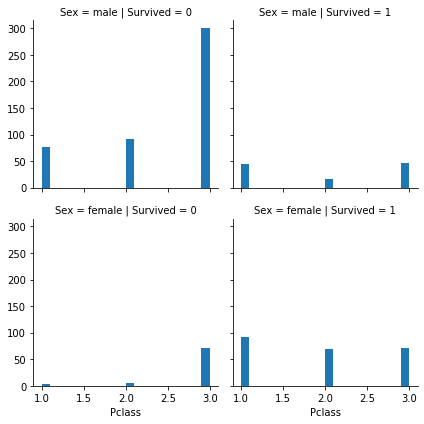

In [25]:
g = sns.FacetGrid(train_df, col='Survived', row='Sex')
g.map(plt.hist, 'Pclass', bins=20)

In [26]:
#passenger of class 3rd are most and most of them did not survived
#passenger who were Female and belong to 1 or 2 class are mostly suvived

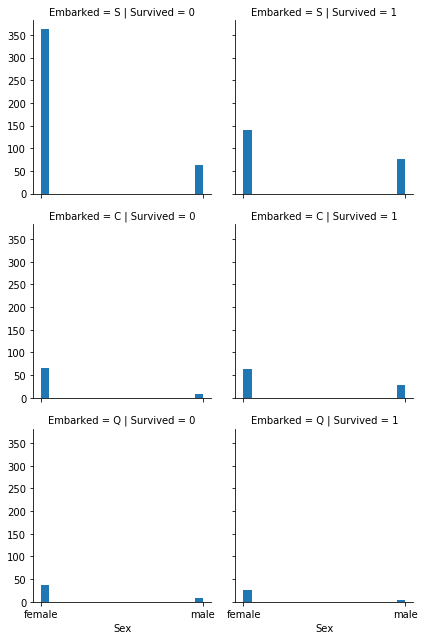

In [27]:
g=sns.FacetGrid(train_df,col='Survived',row='Embarked')
g.map(plt.hist, 'Sex', bins=20)

In [28]:
#make the date set now
train_df=train_df.drop(['Cabin','Ticket'],axis=1)
#test_df
test_df=test_df.drop(['Cabin','Ticket'],axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [29]:
train_df=train_df.drop(['Name'],axis=1)
train_df=train_df.replace(['male','female'],[1,0]);
train_df['Embarked'].fillna('S', inplace=True)
train_df=train_df.replace(['C','Q','S'],[0,1,2]);
train_df['Age'].fillna(28, inplace=True)
train_df['Age']=train_df['Age']/10
train_df['Fare']=round(train_df['Fare']/10,2)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,2.2,1,0,0.72,2
1,2,1,1,0,3.8,1,0,7.13,0
2,3,1,3,0,2.6,0,0,0.79,2
3,4,1,1,0,3.5,1,0,5.31,2
4,5,0,3,1,3.5,0,0,0.80,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.7,0,0,1.30,2
887,888,1,1,0,1.9,0,0,3.00,2
888,889,0,3,0,2.8,1,2,2.34,2
889,890,1,1,1,2.6,0,0,3.00,0


In [30]:
test_df=test_df.drop(['Name'],axis=1)
test_df=test_df.replace(['male','female'],[1,0]);
test_df['Embarked'].fillna('S', inplace=True)
test_df=test_df.replace(['C','Q','S'],[0,1,2]);
test_df['Age'].fillna(28, inplace=True)
test_df['Age']=test_df['Age']/10
test_df['Fare']=round(test_df['Fare']/10,2)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,3.45,0,0,0.78,1
1,893,3,0,4.70,1,0,0.70,2
2,894,2,1,6.20,0,0,0.97,1
3,895,3,1,2.70,0,0,0.87,2
4,896,3,0,2.20,1,1,1.23,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,2.80,0,0,0.80,2
414,1306,1,0,3.90,0,0,10.89,0
415,1307,3,1,3.85,0,0,0.72,2
416,1308,3,1,2.80,0,0,0.80,2


In [31]:
# now making prediction
#drop passengerid
#train_df=train_df.drop(['PassengerId'],axis=1)
#test_df=test_df.drop(['PassengerId'],axis=1)

In [32]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,2.2,1,0,0.72,2
1,2,1,1,0,3.8,1,0,7.13,0
2,3,1,3,0,2.6,0,0,0.79,2
3,4,1,1,0,3.5,1,0,5.31,2
4,5,0,3,1,3.5,0,0,0.80,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.7,0,0,1.30,2
887,888,1,1,0,1.9,0,0,3.00,2
888,889,0,3,0,2.8,1,2,2.34,2
889,890,1,1,1,2.6,0,0,3.00,0


In [33]:
test_df['Fare'].fillna(10,inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [34]:
x_train=train_df.drop(['Survived','PassengerId'], axis=1)
y_train=train_df["Survived"]
x_test=test_df.copy()
x_test=x_test.drop(['PassengerId'], axis=1)

In [35]:
x_test
x_test.shape


(418, 7)

In [36]:
# applying algorithm
#logistic Regression
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)
acc_log = round(logistic_regression.score(x_train, y_train) * 100, 2)   #accurary based only on training data
acc_log



80.02

In [37]:
#knn algorithm 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2) #accurary based only on training data
acc_knn

88.33

In [38]:
#support vector
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train,y_train) * 100, 2)
acc_svc

79.8

In [39]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train,y_train) * 100, 2)
acc_gaussian

79.24

In [40]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train,y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train,y_train) * 100, 2)
acc_perceptron

74.41

In [41]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train,y_train) * 100, 2)
acc_linear_svc

C:\Users\Aryan\Anaconda3\envs\new\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.02

In [42]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

79.69

In [43]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

97.53

In [44]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

97.53

In [45]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,97.53
8,Decision Tree,97.53
1,KNN,88.33
2,Logistic Regression,80.02
7,Linear SVC,80.02
0,Support Vector Machines,79.80
6,Stochastic Gradient Decent,79.69
4,Naive Bayes,79.24
5,Perceptron,74.41


In [46]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })

submission.set_index("PassengerId", inplace = True) 
# submission.to_csv('../output/submission.csv', index=False)

In [47]:
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0
...,...
1305,0
1306,1
1307,0


In [48]:
submission.to_csv('prediction.csv')